# Data Processing

In [1]:
import pydicom
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
from IPython.display import display, HTML
import gdcm
from csf.data.process import *
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
# Seaborn
sns.set_palette("Blues_r")
sns.set_style("whitegrid")
FIGSIZE = (12,8)
DARKBLUE = "#1C3879"
LIGHTBLUE = "steelblue"
# Pandas
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_colwidth", 100)
# Directories and Filepaths
TRAIN_IMAGES_DIR = "data/raw/train_images"
TEST_IMAGES_DIR = "data/raw/test_images"
SEGMENTATIONS_DIR = "data/raw/segmentations"
TRAINING_METADATA_FILEPATH = "data/raw/train.csv"
TEST_METADATA_FILEPATH = "data/raw/test.csv"
TRAIN_BOUNDING_BOXES_FILEPATH = "data/raw/train_bounding_boxes.csv"
SAMPLE_IMAGE = "data/raw/train_images/1.2.826.0.1.3680043.25772/325.dcm"


## Dataset

In [3]:
dataset = pydicom.dcmread(SAMPLE_IMAGE)

## Hounsfield Transformation

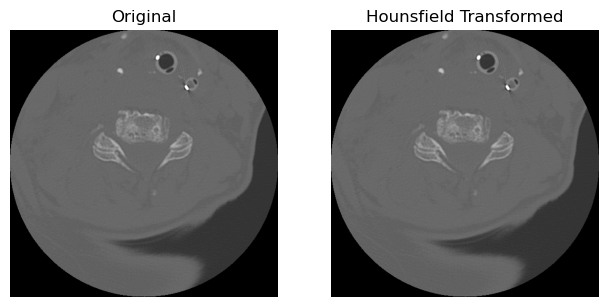

In [4]:
x4mer = HounsfieldTransformer(name='hounsfield', params={'display': True})
image = x4mer.execute(data=dataset)

## Windowing

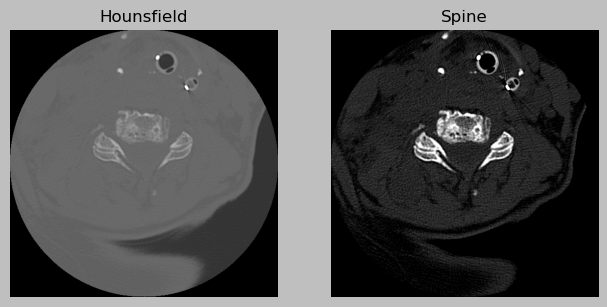

In [5]:
name = "windower"
params = {'center': 400, 'width': 1000, 'display': True}
windower = Windower(name=name, params=params)
image = windower.execute(data=image)

## Noise Reduction

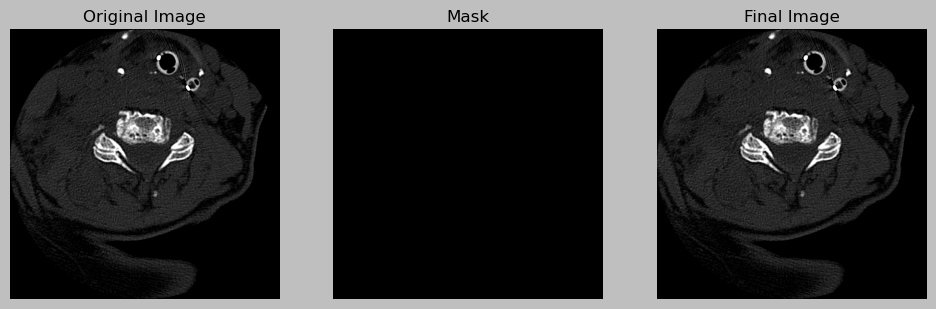

In [6]:
name = "denoiser"
params = {"radius": 5, "display": True}
dn = Denoiser(name=name, params=params)
_ = dn.execute(image)